<a href="https://colab.research.google.com/github/TNLE01/MLA_TNL/blob/main/MLA1_TNL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 1

Truong Le

CS430

Machine Learning in the Cloud

In [ ]:
import requests
from bs4 import BeautifulSoup as bfs
import pandas as pd

In [ ]:
# Read the file into a dataset named “df” from your Google Drive.
df = pd.read_csv('/content/drive/MyDrive/weather_2012.csv')

In [ ]:
# the first five rows of the dataset
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
# the last five rows of the dataset
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [ ]:
# a sample of five random rows
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
1164,2012-02-18 12:00:00,1.1,-5.7,60,15,48.3,100.75,Mostly Cloudy
8505,2012-12-20 09:00:00,-1.7,-4.5,81,13,24.1,101.98,Cloudy
4205,2012-06-24 05:00:00,14.0,9.2,73,6,48.3,101.04,Clear
7175,2012-10-25 23:00:00,9.3,6.6,83,9,25.0,101.45,Clear
639,2012-01-27 15:00:00,0.3,-1.6,87,19,2.4,98.65,"Drizzle,Fog"


In [ ]:
# display a list of all of the columns in the dataset
list(df.columns)

['Date/Time',
 'Temp (C)',
 'Dew Point Temp (C)',
 'Rel Hum (%)',
 'Wind Spd (km/h)',
 'Visibility (km)',
 'Stn Press (kPa)',
 'Weather']

In [ ]:
# Rename
df = pd.read_csv('/content/drive/MyDrive/weather_2012.csv', header = 0, names =  ('date_time', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather'))
list(df.columns)

['date_time',
 'temp_c',
 'dew_point',
 'relative_humidity',
 'wind_speed',
 'visibility',
 'pressure',
 'weather']

In [ ]:
# standard statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp_c,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
dew_point,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
relative_humidity,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
wind_speed,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
visibility,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
pressure,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


In [ ]:
# Write the code to add a column named temp_f to the dataset that contains the temperature from temp_c represented in Fahrenheit.
temp_f = []
for i in df['temp_c']:
  temp_f.append((i * 1.8) + 32)

df['temp_f'] = temp_f

In [ ]:
# rearrange the columns in the dataset so temp_f appears immediately before temp_c
df = df[['date_time', 'temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']]

In [ ]:
# display the data types of all the columns in the dataset
df.dtypes

,0
date_time,object
temp_f,float64
temp_c,float64
dew_point,float64
relative_humidity,int64
wind_speed,int64
visibility,float64
pressure,float64
weather,object


In [ ]:
# The date_time column is not actually considered a date by Pandas.  Write the code to convert this column to a date/time column and to verify the conversion was successful.
df['date_time'] = pd.to_datetime(df.date_time)
df.dtypes

,0
date_time,datetime64[ns]
temp_f,float64
temp_c,float64
dew_point,float64
relative_humidity,int64
wind_speed,int64
visibility,float64
pressure,float64
weather,object


In [ ]:
# Write the code to get the average temperature (in F) for each month and write it into an object called monthly_avg. This object should be a Pandas Series which is similar to a Pandas Dataframe except it only has one column.  You will plot this data later.
counter = -1
jan = []; feb = []; mar = []; apr = []; may = []; jun = []; jul = []; aug = []; sep = []; oct = []; nov = []; dec = [];
months = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]
data = []
for i in df['date_time']:
  counter += 1
  current_data = round(df['temp_f'][counter], 2)
  match i.month:
    case 1:
      jan.append(current_data)
    case 2:
      feb.append(current_data)
    case 3:
      mar.append(current_data)
    case 4:
      apr.append(current_data)
    case 5:
      may.append(current_data)
    case 6:
      jun.append(current_data)
    case 7:
      jul.append(current_data)
    case 8:
      aug.append(current_data)
    case 9:
      sep.append(current_data)
    case 10:
      oct.append(current_data)
    case 11:
      nov.append(current_data)
    case 12:
      dec.append(current_data)

def get_mean(list):
  return (sum(list)/len(list))

for month in months:
  data.append(get_mean(month))

monthly_avg = pd.Series(data)
monthly_avg

,0
0,18.731290
1,24.395000
2,37.618226
3,44.616750
4,61.227984
5,68.241250
6,73.022097
7,72.102742
8,61.672000
9,51.718952


In [ ]:
# scatterplot that compares the temperature against the relative humidity
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
px.scatter(df, x = 'temp_f', y = 'relative_humidity', title = 'Temperature vs. Relative Humidity').show()

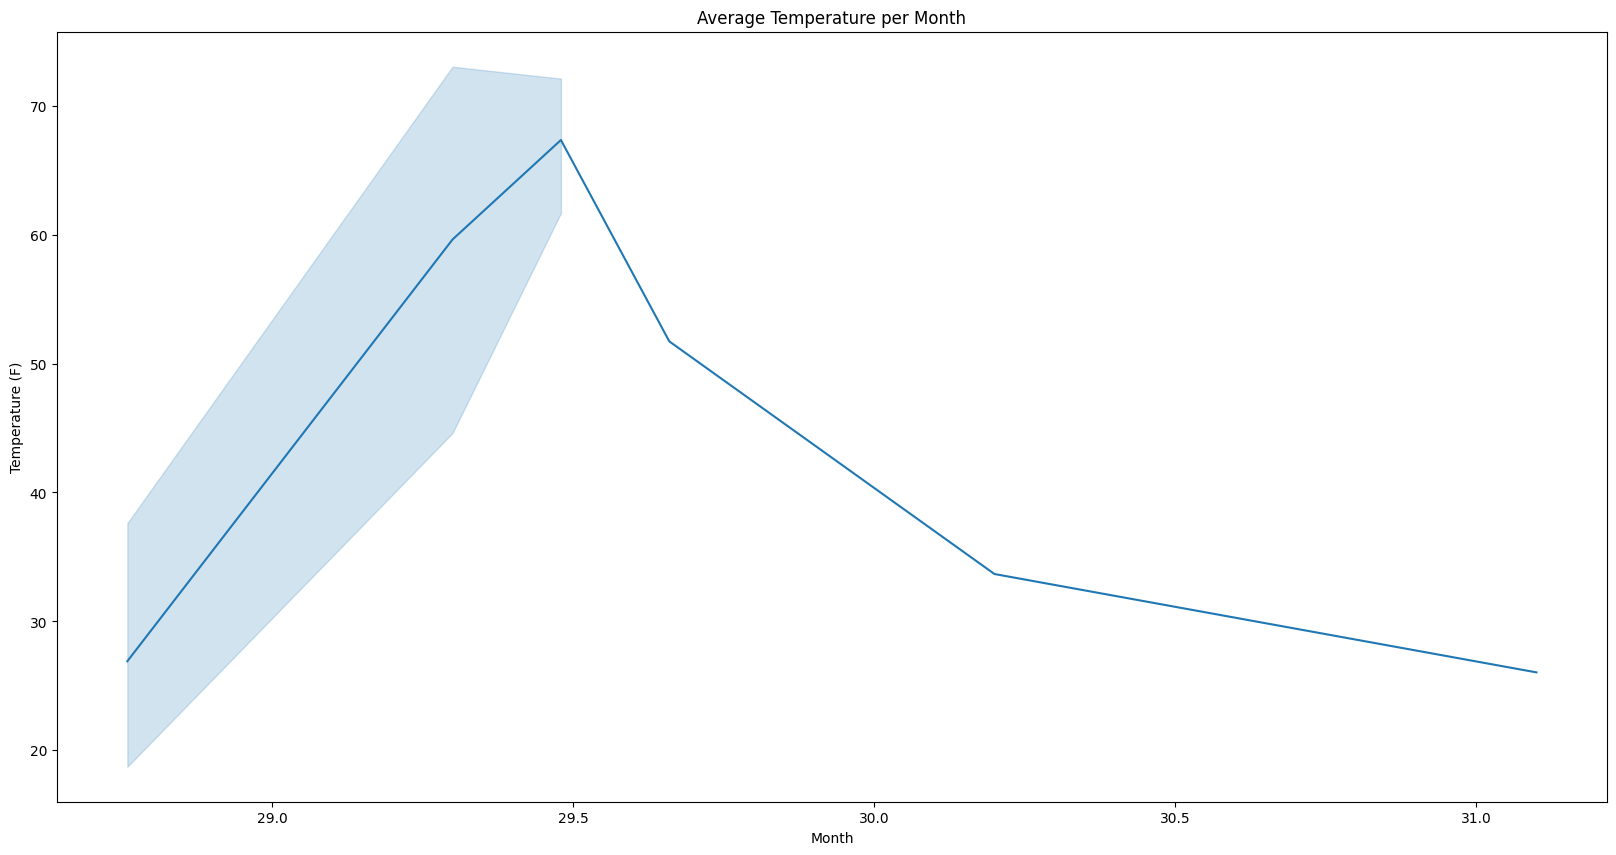

In [ ]:
# line chart that shows the average temperature per month
plt.figure(figsize = (20, 10))
sns.lineplot(x = df['temp_f'], y = monthly_avg).set(xlabel = 'Month', ylabel = 'Temperature (F)')
plt.title('Average Temperature per Month')
plt.show()

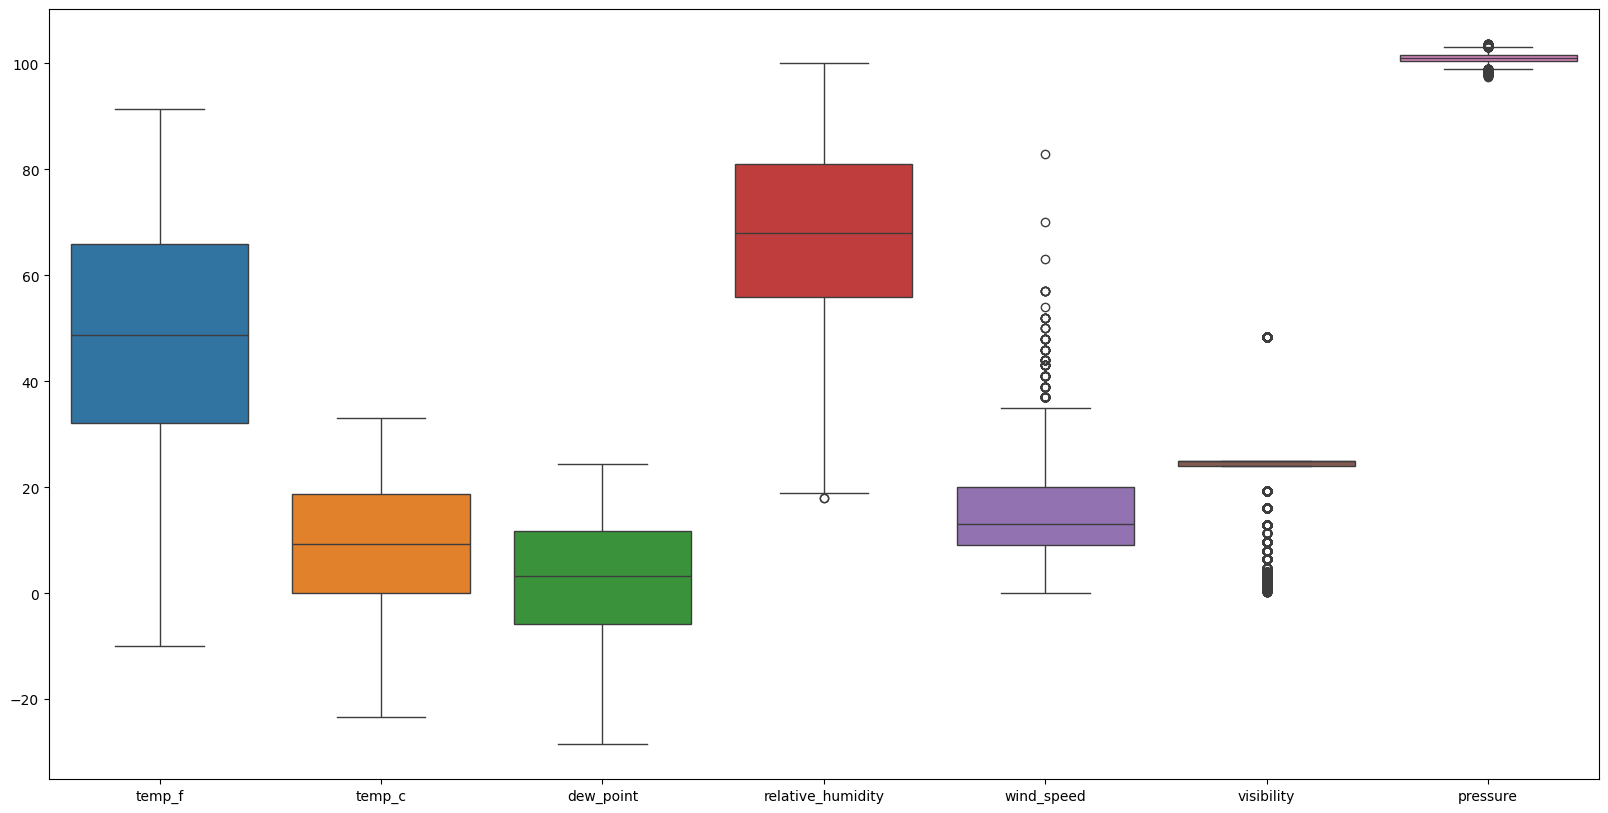

In [ ]:
# box plot
plt.figure(figsize = (20, 10))
sns.boxplot(data = df)
plt.show()